###Goals :
- Mendiagnosa hal yang menunjukkan apakah individu tersebut menderita diabetes atau tidak
- Memprediksi kemungkinan diabetes berdasarkan faktor risiko yang diberikan.
- Meneliti, menganalisis, dan mengembangkan model prediktif yang bertujuan untuk meningkatkan diagnosis dan manajemen diabetes.

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Pastel1')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Diabetes_prediction.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [4]:
df.shape

(1000, 9)

##A. Apakah terdapat data yang mengalami duplicated?

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
df.duplicated().sum()

0

####Tidak ada data yang duplicated

##B. Apakah terdapat data yang dtypenya tidak sesuai?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


####Dtype dari data sudah sesuai semua

##C. Apakah terdapat data yang mengalami missing values?

In [8]:
df.isna().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

####Tidak ada data yang missing values

##D. Apakah terdapat data yang outliers?

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis'],
      dtype='object')

In [10]:
df_to_plot = pd.read_csv('Diabetes_prediction.csv')

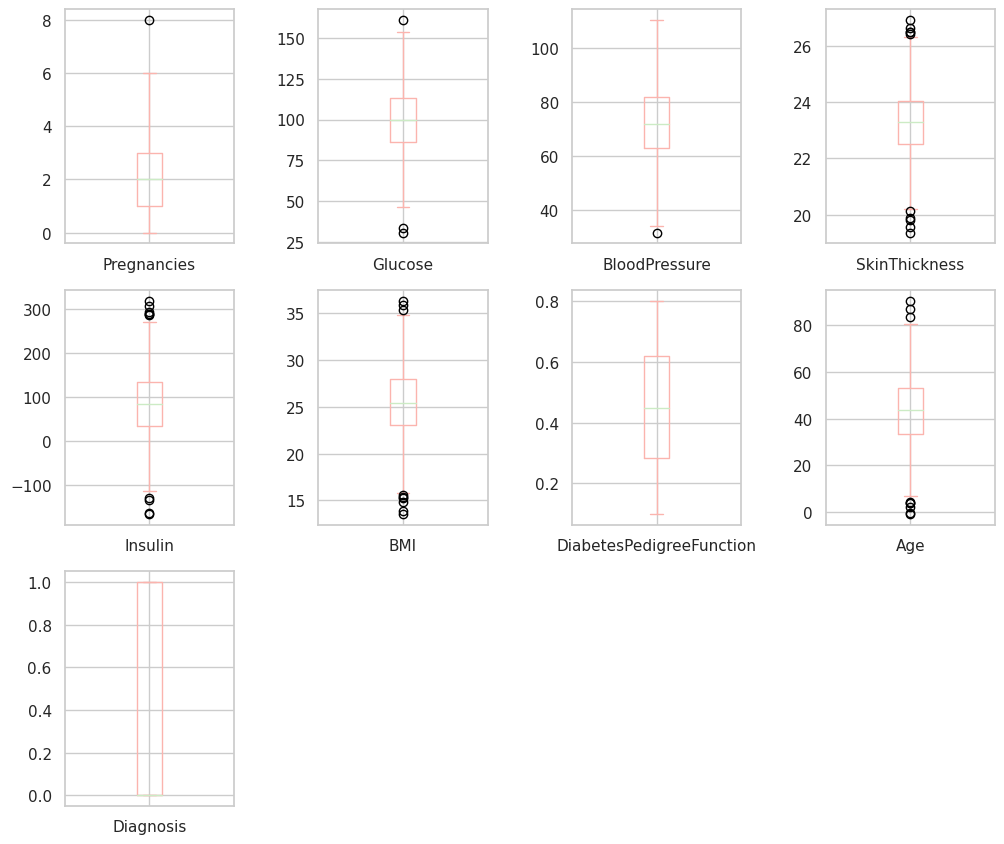

In [11]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [12]:
numeric = df_to_plot.columns
numeric

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis'],
      dtype='object')

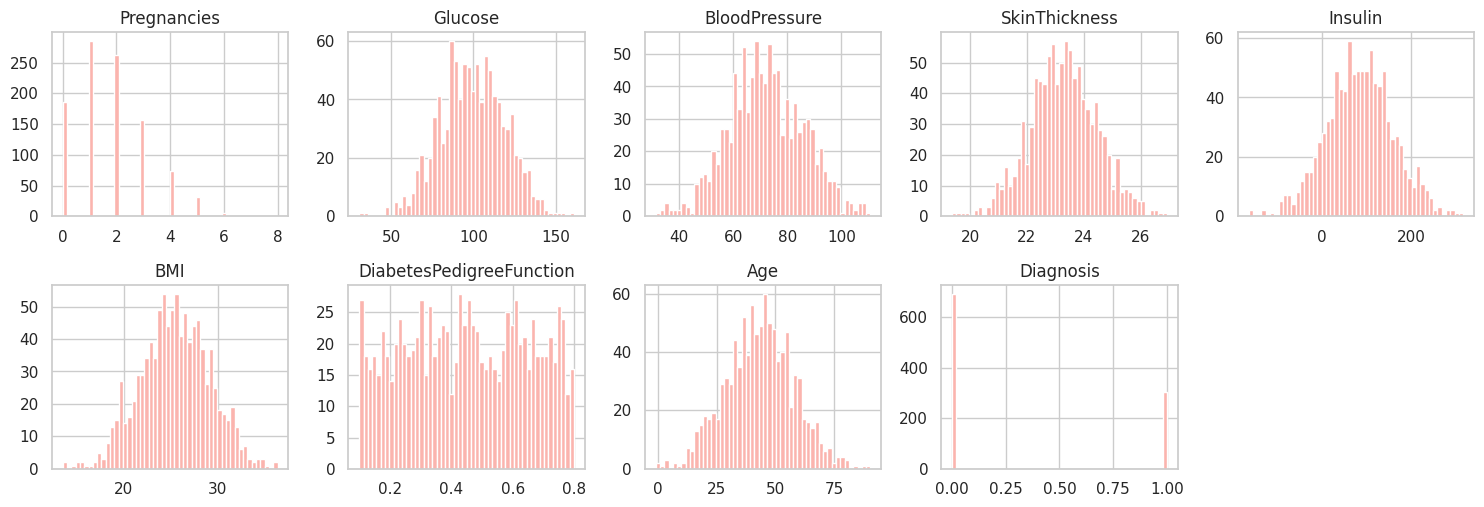

In [13]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,5), column=numeric)
plt.tight_layout() #Agar Layout rapih
plt.show() #Untuk Menampilkan

####Tidak ada data yang mengalami outliers

#DATA INSIGHT

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [15]:
def barPerc(df,xVar,ax):
  numX=len([x for x in df[xVar].unique() if x==x])
  bars = ax.patches
  for ind in range(numX):
    hueBars=bars[ind:][::numX]
    total = sum([x.get_height() for x in hueBars])
    for bar in hueBars:
      ax.text(bar.get_x() + bar.get_width()/2.,
              bar.get_height(),
              f'{bar.get_height()/total:.0%}',
              ha="center",va="bottom")
#Sebagai code untuk membuat persentase

##Pregnancies

<Axes: xlabel='Pregnancies', ylabel='Count'>

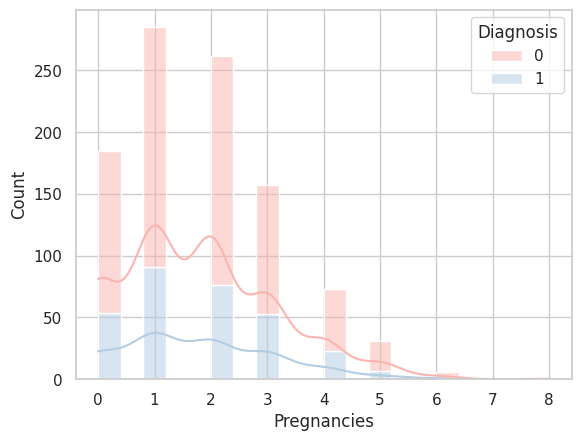

In [16]:
sns.histplot(data=df, x='Pregnancies', hue='Diagnosis', multiple='stack', kde=True)

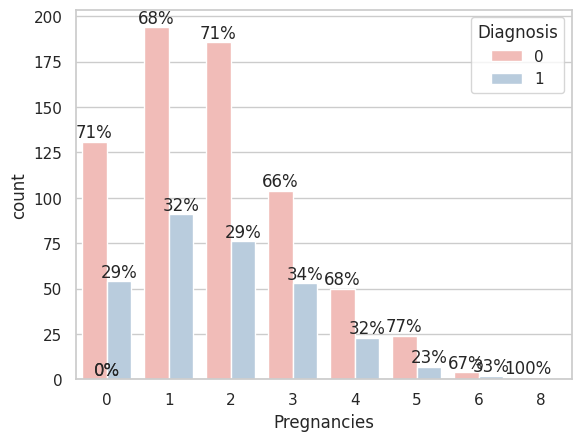

In [17]:
ax = sns.countplot(x='Pregnancies', hue='Diagnosis', data=df)
barPerc(df,'Pregnancies', ax)

####Individu yang memiliki jumlah melahirkan sebanyak 3 kali, cenderung terkena diabetes

##Glucose

<Axes: xlabel='Glucose', ylabel='Count'>

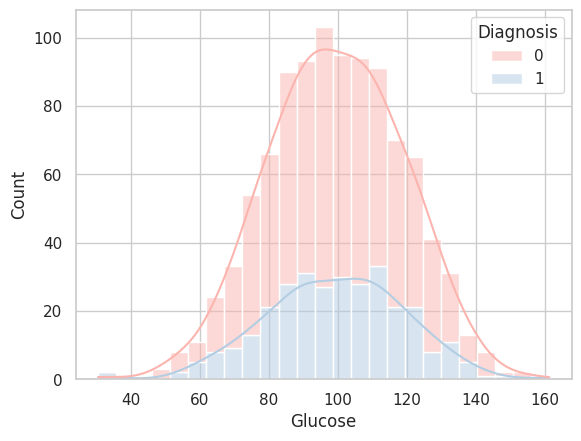

In [18]:
sns.histplot(data=df, x='Glucose', hue='Diagnosis', multiple='stack', kde=True)

####Pasien yang terdiagnosis terkena diabetes sebanyak 25 - 35 individu per kadar glukosa. Dan rata - rata pasien memiliki kadar glukosa 90 - 115

##BloodPressure

<Axes: xlabel='BloodPressure', ylabel='Count'>

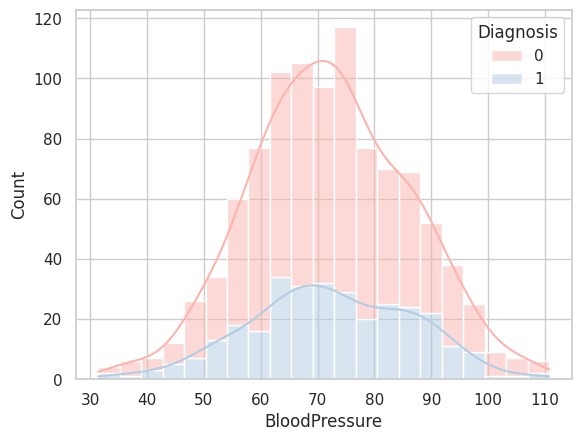

In [19]:
sns.histplot(data=df, x='BloodPressure', hue='Diagnosis', multiple='stack', kde=True)

####Pasien yang terdiagnosis terkena diabetes sebanyak 25 - 35 individu per kadar tekanan darah. Dan rata - rata pasien memiliki tekanan darah 63 - 75

##SkinThickness

<Axes: xlabel='SkinThickness', ylabel='Count'>

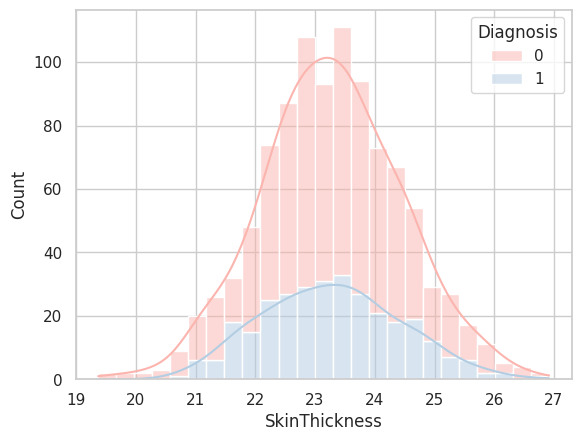

In [20]:
sns.histplot(data=df, x='SkinThickness', hue='Diagnosis', multiple='stack', kde=True)

####Rata - rata individu yang terdiagnosa terkena penyakit diabetes memiliki ketebalan kulit 23 - 24

##Insulin

<Axes: xlabel='Insulin', ylabel='Count'>

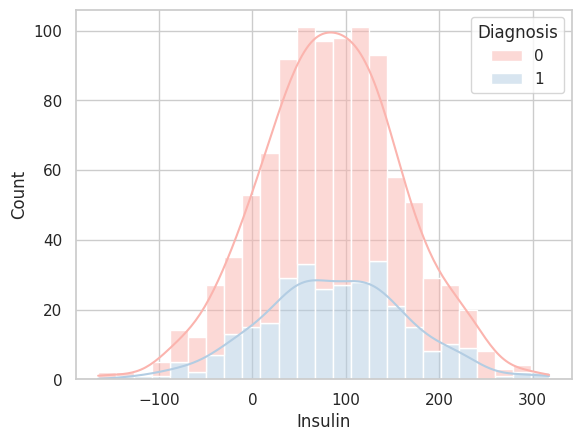

In [21]:
sns.histplot(data=df, x='Insulin', hue='Diagnosis', multiple='stack', kde=True)

####Individu yang memiliki kadar insulin di range 90 - 130, cenderung terdiagnosa terkena penyakit diabetes

##BMI (Body Max Index)

<Axes: xlabel='BMI', ylabel='Count'>

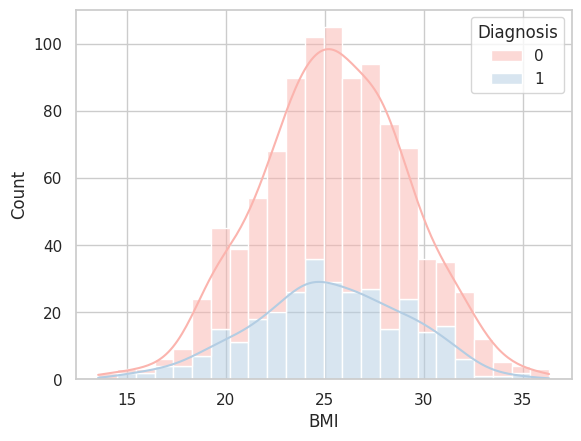

In [22]:
sns.histplot(data=df, x='BMI', hue='Diagnosis', multiple='stack', kde=True)

####Individu yang memiliki berat badan 18 - 25 (cenderung lebih sedikit yang terkena penyakit diabetes). Tetapi, individu yang memiliki berat > 25 (berlebih) cenderung lebih banyak yang terkena diabetes.

##DiabetesPedigreeFunction

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

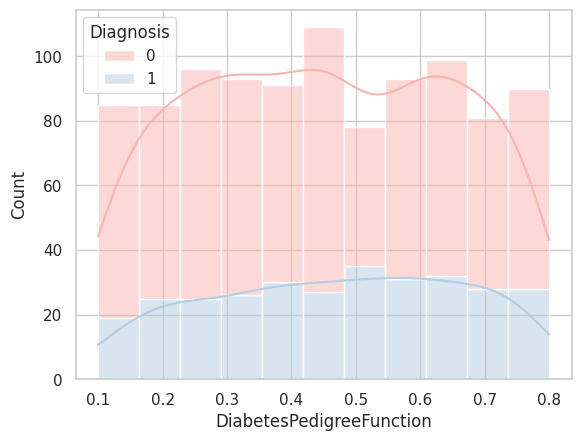

In [23]:
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Diagnosis', multiple='stack', kde=True)

##Age

<Axes: xlabel='Age', ylabel='Count'>

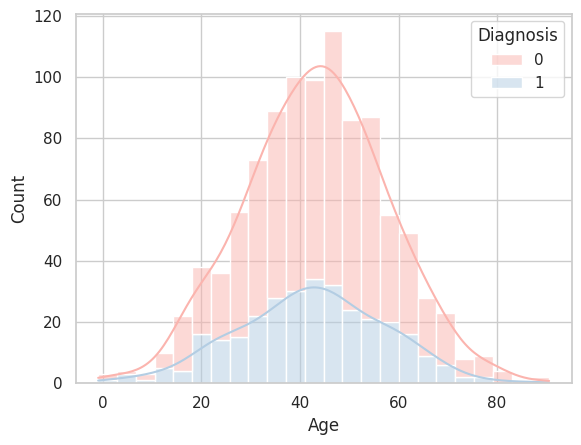

In [24]:
sns.histplot(data=df, x='Age', hue='Diagnosis', multiple='stack', kde=True)

####Individu yang memiliki umur di range 20-45, cenderung rawan terkena penyakti daibetes

## Data Splitting :
- Data Train (Mempelajari data-data dan pola-pola) = 60%
- Data Validation (Untuk mengevaluasi data yang sudah ada di Data Train) = 20%
- Data Test (Untuk pengetesan kembali setelah data validation) = 205

In [25]:
df = pd.read_csv('Diabetes_prediction.csv')
df.shape

(1000, 9)

In [26]:
from sklearn.model_selection import train_test_split
#Fungsi ini digunakan untuk membagi dataset menjadi dua subset: subset untuk pelatihan (training) dan subset untuk pengujian (testing), yang berguna dalam melakukan evaluasi mode

In [27]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

#train_test_split berfungsi untuk membagi variabel panggilan menjadi 2 jenis, yaotu df_full_train, df_test untuk code pertama dan df_train, df_valid untuk code kedua

In [28]:
df_train.shape, df_valid.shape, df_test.shape

((600, 9), (200, 9), (200, 9))

In [29]:
600/1000, 200/1000, 200/10000

(0.6, 0.2, 0.02)

###Kesimpulan :

1. Hal yang dapat menjadi faktor individu terkena diabetes atau tidak, diantaranya:
- Jumlah Kehamilan
- Tekanan Darah
- Kadar Gula
- Indeks Berat Badan
- Umur
- Insulin
- Ketebalan Kulit

2. Beberapa kemungkinan individu terkena diabetes menurut beberapa indikator:
- Individu yang memiliki jumlah melahirkan sebanyak 3 kali, cenderung terkena diabetes.
- Pasien yang terdiagnosis terkena diabetes sebanyak 25 - 35 individu per kadar glukosa. Dan rata - rata pasien memiliki kadar glukosa 90 - 115
- Pasien yang terdiagnosis terkena diabetes sebanyak 25 - 35 individu per kadar tekanan darah. Dan rata - rata pasien memiliki tekanan darah 63 - 75
- Rata - rata individu yang terdiagnosa terkena penyakit diabetes memiliki ketebalan kulit 23 - 24
- Individu yang memiliki kadar insulin di range 90 - 130, cenderung terdiagnosa terkena penyakit diabetes
- Individu yang memiliki berat badan 18 - 25 (cenderung lebih sedikit yang terkena penyakit diabetes). Tetapi, individu yang memiliki berat > 25 (berlebih) cenderung lebih banyak yang terkena diabetes.
- Individu yang berumur di range 20-45, cenderung rawan terkena penyakti diabetes